In [3]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [57]:
adata = sc.read_visium('/diskmnt/Datasets/Spatial_Transcriptomics/outputs_OCT/Human/HT112C1/H1/HT112C1-U1_ST_Bn1/outs')

In [64]:
adata.var_names_make_unique()
adata.raw = adata
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [65]:
adata_dis500 = adata.copy()
adata_dis500

AnnData object with n_obs × n_vars = 1975 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

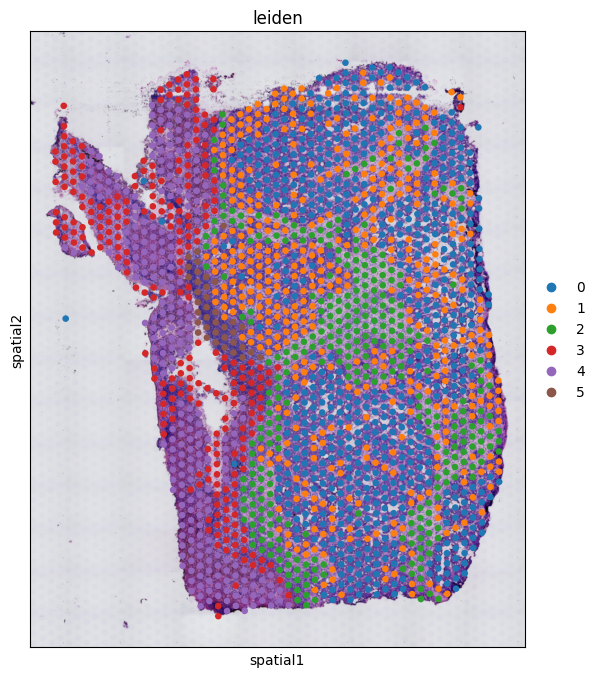

In [66]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)
sc.pl.spatial(adata, color='leiden')

In [67]:
df_cellchat = ct.pp.ligand_receptor_database(species='human', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1199, 4)


In [68]:
print(df_cellchat.head())

       0              1     2                   3
0  TGFB1  TGFBR1_TGFBR2  TGFb  Secreted Signaling
1  TGFB2  TGFBR1_TGFBR2  TGFb  Secreted Signaling
2  TGFB3  TGFBR1_TGFBR2  TGFb  Secreted Signaling
3  TGFB1  ACVR1B_TGFBR2  TGFb  Secreted Signaling
4  TGFB1  ACVR1C_TGFBR2  TGFb  Secreted Signaling


In [13]:
df_cellchat.to_csv('/diskmnt/Projects/Users/slivingston/subclone_data.csv')

In [69]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(279, 4)


In [70]:
adata_dis500

AnnData object with n_obs × n_vars = 1975 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [72]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)

In [ ]:
'commot-cellchat-MIF-CD74_CXCR4'
'commot-cellchat-MIF-CD74_CD44'
'commot-cellchat-TNFSF13B-TNFRSF13B'
'commot-cellchat-SPP1-CD44'
'commot-cellchat-MDK-SDC2'
'commot-cellchat-LGALS9-CD44'

Text(0.5, 1.0, 'Receiver')

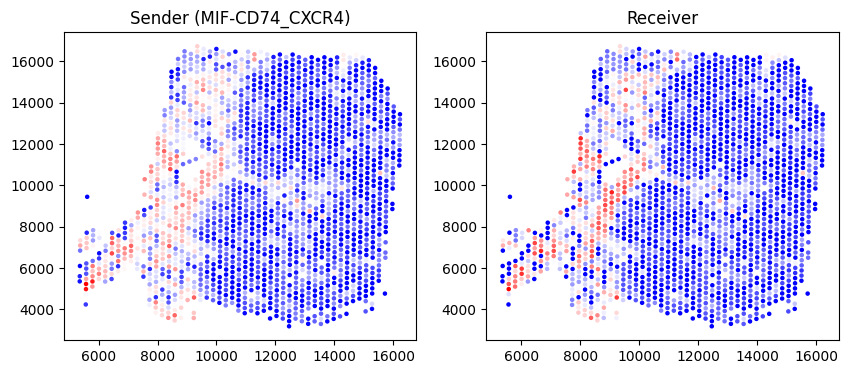

In [46]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MIF-CD74_CXCR4']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CXCR4']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MIF-CD74_CXCR4)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

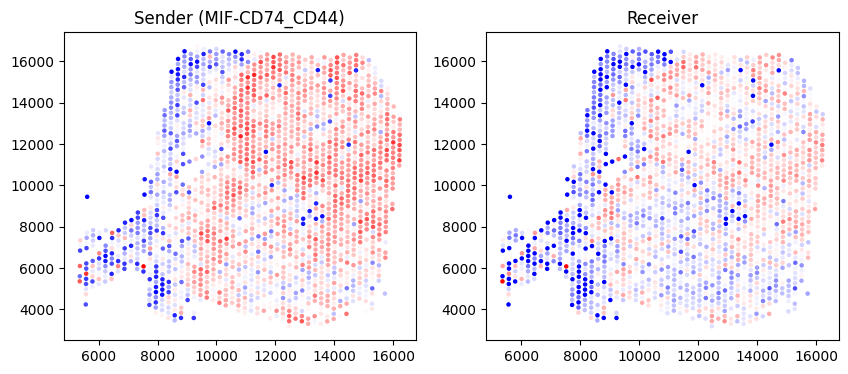

In [45]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MIF-CD74_CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MIF-CD74_CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

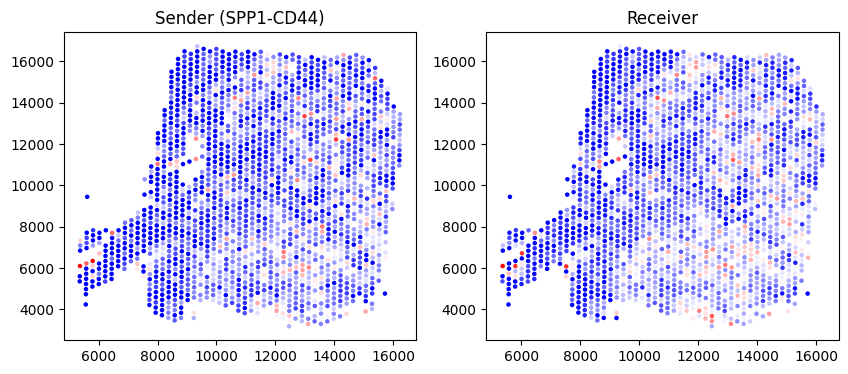

In [47]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-SPP1-CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-SPP1-CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (SPP1-CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

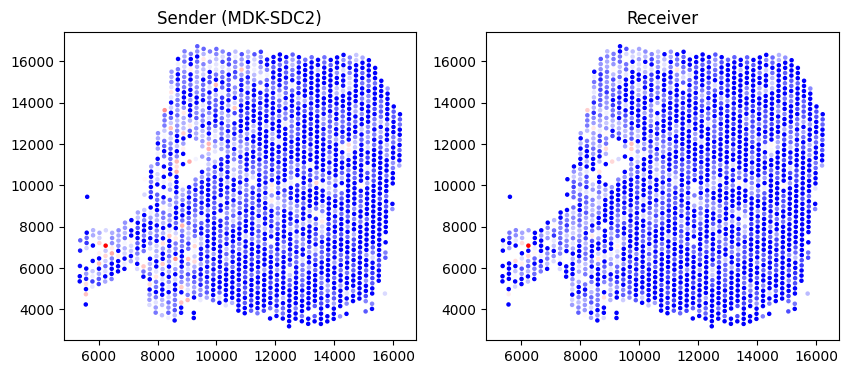

In [48]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MDK-SDC2']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MDK-SDC2']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MDK-SDC2)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

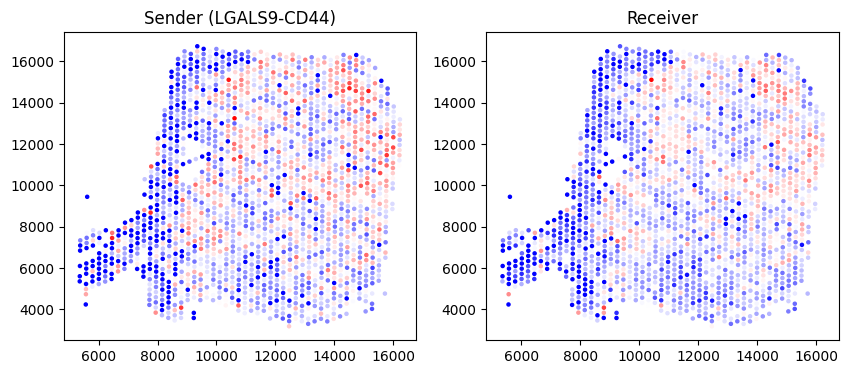

In [49]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-LGALS9-CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-LGALS9-CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (LGALS9-CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

In [74]:
#adata_dis500 = sc.read_h5ad("./adata.h5ad")
adata = sc.read_visium('/diskmnt/Datasets/Spatial_Transcriptomics/outputs_OCT/Human/HT112C1/H1/HT112C1-U1_ST_Bn1/outs')
adata_dis500.layers['counts'] = adata.X

In [76]:
df_deg, df_yhat = ct.tl.communication_deg_detection(adata_dis500,
    database_name = 'cellchat', pathway_name='MIF-CD74_CD44', summary = 'receiver')

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~18m 31s       |+                                                 | 2 % ~16m 56s       |++                                                | 3 % ~16m 52s       |++                                                | 4 % ~16m 10s       |+++                                               | 5 % ~15m 44s       |+++                                               | 6 % ~15m 24s       |++++                                              | 7 % ~15m 29s       |++++                                              | 8 % ~15m 24s       |+++++                                             | 9 % ~15m 14s       |+++++                                             | 10% ~15m 04s       |++++++                                            | 11% ~14m 54s       |++++++                                            | 12% ~14m 42s       |+++++++                                           | 13% ~14m 

In [77]:
import pickle
deg_result = {"df_deg": df_deg, "df_yhat": df_yhat}
with open('./deg_MIF-CD74_CD44.pkl', 'wb') as handle:
    pickle.dump(deg_result, handle, protocol=pickle.HIGHEST_PROTOCOL)

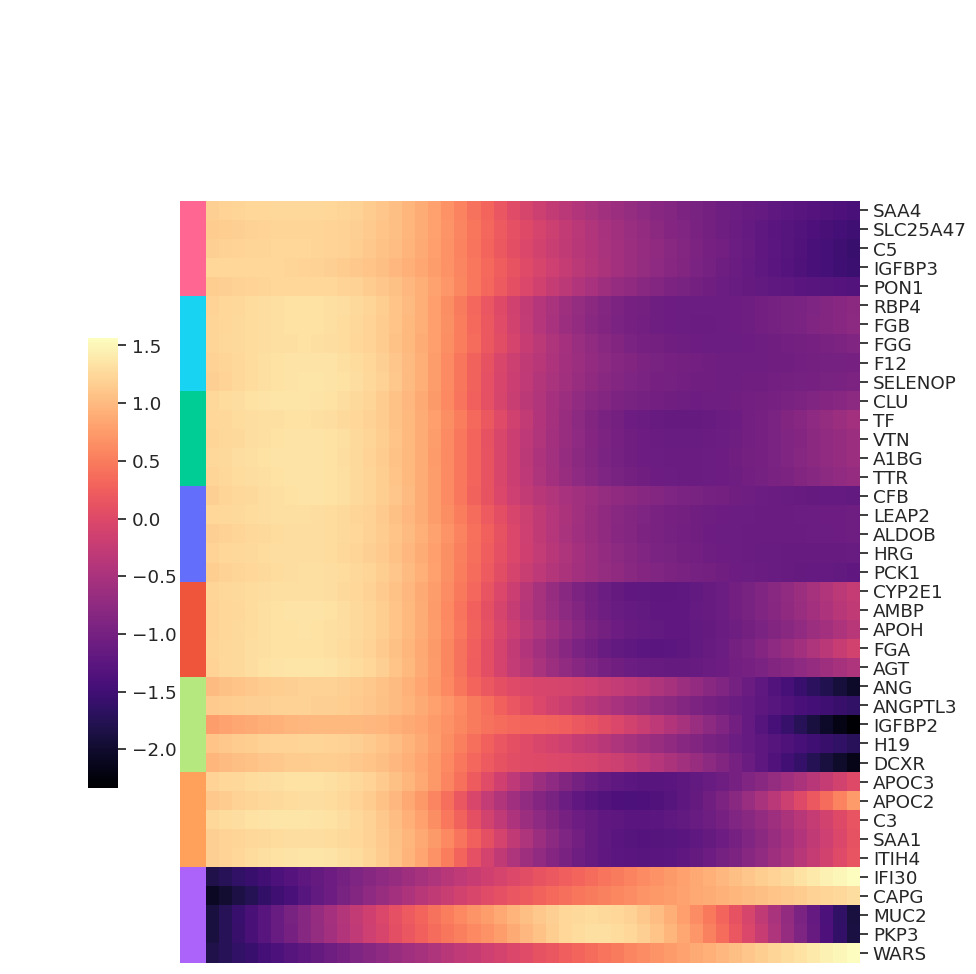

In [78]:
with open("./deg_PSAP.pkl", 'rb') as file:
    deg_result = pickle.load(file)
df_deg_clus, df_yhat_clus = ct.tl.communication_deg_clustering(df_deg, df_yhat, deg_clustering_res=0.4)
top_de_genes_PSAP = ct.pl.plot_communication_dependent_genes(df_deg_clus, df_yhat_clus, top_ngene_per_cluster=5,
    filename='./heatmap_deg_MIF-CD74_CD44.pdf', font_scale=1.2, return_genes=True)

Text(0.5, 1.0, 'An example positive DE gene (IFI30)')

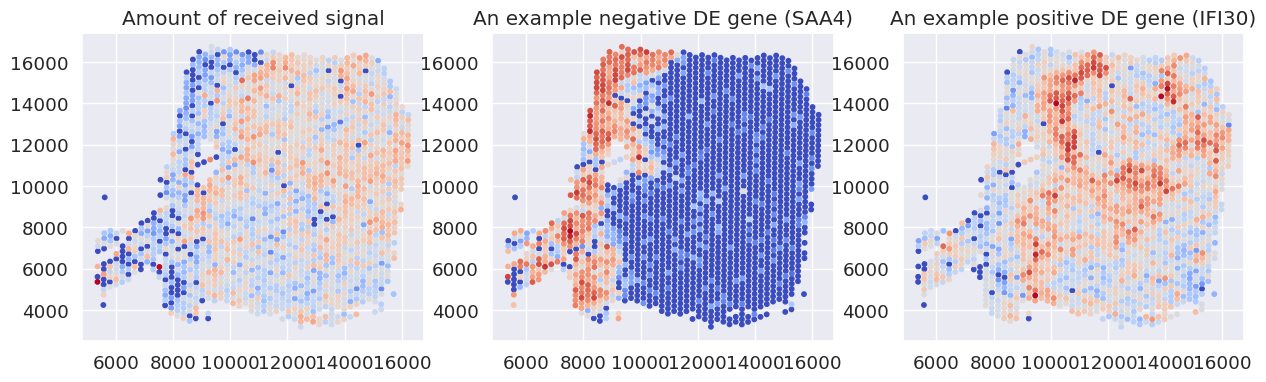

In [79]:
X_sc = adata_dis500.obsm['spatial']
fig, ax = plt.subplots(1,3, figsize=(15,4))
colors = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CD44'].values
idx = np.argsort(colors)
ax[0].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
colors = adata_dis500[:,'SAA4'].X.toarray().flatten()
idx = np.argsort(colors)
ax[1].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
colors = adata_dis500[:,'IFI30'].X.toarray().flatten()
idx = np.argsort(colors)
ax[2].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
ax[0].set_title('Amount of received signal')
ax[1].set_title('An example negative DE gene (SAA4)')
ax[2].set_title('An example positive DE gene (IFI30)')